# Computer Vision CW

## Imports

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from skimage import color, img_as_float, img_as_ubyte
from skimage.io import imread
from skimage import color, img_as_float, img_as_ubyte
from skimage import data

import cv2
import os

from joblib import dump, load

## Google Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '/content/drive/MyDrive/Rohit_Computer_Vision/Computer_Vision_CW'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Computer Vision CW.ipynb', '.ipynb_checkpoints']


## Image Pre-processing

In [ ]:
#After setting up the connection between file explorer and google colab we import the images and labels

#Setting the training images and labels directory
train_images_dir = "/content/drive/MyDrive/CW_Folder_PG/Coursework_dataset/train/images"
train_labels_dir = "/content/drive/MyDrive/CW_Folder_PG/Coursework_dataset/train/labels"

#Setting the testing images and labels directory
test_images_dir = "/content/drive/MyDrive/CW_Folder_PG/Coursework_dataset/test/images"
test_labels_dir = "/content/drive/MyDrive/CW_Folder_PG/Coursework_dataset/test/labels"

In [ ]:
#Creating a dictionary of labels and keys for Training Data
train_image_label_dict = {}

#Iterating through every image in the directory
for image in os.listdir(train_images_dir):
  #Splitting the name of the file from it's format (.jpeg)
  filename, extension = os.path.splitext(image)
  #Adding the .txt using string formatting to each label
  label_file = f'{filename}.txt'
  #Setting the image path for the cv2 function to convert the image to numpy arrays
  image_path = os.path.join(train_images_dir, image)
  #CV2 reads each image and assigns it to the local img variable
  img = cv2.imread(image_path)
  #Setting the label path so the text files can be read and assigned to the image via corresponding labels
  label_path = os.path.join(train_labels_dir, label_file)
  with open(label_path, 'r') as f:
    label = f.read().strip()

#Appending the dictionary with their images and labels from the file
  train_image_label_dict[filename] = {'image': img, 'label': label}

In [ ]:
#Outputted code prints a list of images by ascending order for each label for training data
label_image_dict = {}

# Loop through the images in train_image_label_dict and group them by label
for filename, data in train_image_label_dict.items():
    label = data['label']
    image = data['image']

    # Check if the label exists in the dictionary
    if label in label_image_dict:
        # Append the image filename to the list of images for this label
        label_image_dict[label].append(filename)
    else:
        # Create a new list with the current image filename for this label
        label_image_dict[label] = [filename]

# Sort the list of images for each label by increasing number
for label, images in label_image_dict.items():
    label_image_dict[label] = sorted(images)

# Create separate lists for each label
label1_images = label_image_dict.get('0', [])
label2_images = label_image_dict.get('1', [])
label3_images = label_image_dict.get('2', [])

# Print out the list of images for each label
print('Label 0 images:', label1_images)
print('Label 1 images:', label2_images)
print('Label 2 images:', label3_images)

Label 0 images: ['image_0000', 'image_0002', 'image_0011', 'image_0021', 'image_0022', 'image_0023', 'image_0026', 'image_0050', 'image_0051', 'image_0054', 'image_0055', 'image_0056', 'image_0057', 'image_0059', 'image_0060', 'image_0061', 'image_0062', 'image_0065', 'image_0066', 'image_0067', 'image_0068', 'image_0070', 'image_0073', 'image_0074', 'image_0083', 'image_0104', 'image_0105', 'image_0114', 'image_0115', 'image_0116', 'image_0117', 'image_0118', 'image_0119', 'image_0126', 'image_0127', 'image_0128', 'image_0131', 'image_0133', 'image_0134', 'image_0135', 'image_0144', 'image_0145', 'image_0148', 'image_0150', 'image_0152', 'image_0153', 'image_0157', 'image_0161', 'image_0166', 'image_0169', 'image_0170', 'image_0176', 'image_0193', 'image_0205', 'image_0208', 'image_0213', 'image_0214', 'image_0216', 'image_0234', 'image_0235', 'image_0245', 'image_0246', 'image_0247', 'image_0248', 'image_0249', 'image_0251', 'image_0270', 'image_0277', 'image_0278', 'image_0293', 'im

In [ ]:
# Loading the testing data into a dictionary
test_image_label_dict = {}
for image in os.listdir(test_images_dir):
  filename, extension = os.path.splitext(image)
  label_file = f'{filename}.txt'
  image_path = os.path.join(test_images_dir, image)
  img = cv2.imread(image_path)
  label_path = os.path.join(test_labels_dir, label_file)
  with open(label_path, 'r') as f:
    label = f.read().strip()

  test_image_label_dict[filename] = {'image': img, 'label': label}

In [ ]:
#Outputted code prints a list of images by ascending order for each label for testing data

label_image_dict3 = {}

# Loop through the images in train_image_label_dict and group them by label
for filename, data in test_image_label_dict.items():
    label = data['label']
    image = data['image']

    # Check if the label exists in the dictionary
    if label in label_image_dict3:
        # Append the image filename to the list of images for this label
        label_image_dict3[label].append(filename)
    else:
        # Create a new list with the current image filename for this label
        label_image_dict3[label] = [filename]

# Sort the list of images for each label by increasing number
for label, images in label_image_dict3.items():
    label_image_dict3[label] = sorted(images)

# Create separate lists for each label
label1_images = label_image_dict3.get('0', [])
label2_images = label_image_dict3.get('1', [])
label3_images = label_image_dict3.get('2', [])

# Print out the list of images for each label
print('Label 1 images:', label1_images)
print('Label 2 images:', label2_images)
print('Label 3 images:', label3_images)


Label 1 images: ['image_2401', 'image_2402', 'image_2408', 'image_2409', 'image_2410', 'image_2443', 'image_2458', 'image_2465', 'image_2468', 'image_2470', 'image_2472', 'image_2473', 'image_2497', 'image_2498', 'image_2502', 'image_2503', 'image_2516', 'image_2541', 'image_2550', 'image_2555', 'image_2559', 'image_2579', 'image_2580', 'image_2581', 'image_2582', 'image_2583', 'image_2587', 'image_2591', 'image_2619', 'image_2635', 'image_2667', 'image_2686', 'image_2687', 'image_2697', 'image_2703', 'image_2707', 'image_2723', 'image_2726', 'image_2742', 'image_2752', 'image_2753', 'image_2767', 'image_2793', 'image_2796', 'image_2797', 'image_2807', 'image_2826', 'image_2838', 'image_2839', 'image_2841', 'image_2842']
Label 2 images: ['image_2394', 'image_2395', 'image_2396', 'image_2397', 'image_2398', 'image_2399', 'image_2400', 'image_2403', 'image_2404', 'image_2405', 'image_2406', 'image_2407', 'image_2411', 'image_2412', 'image_2413', 'image_2415', 'image_2416', 'image_2417', 

## Initial Data Analysis

In [ ]:
#An example of how the dictionary is layed out, with images represented in multidimensional arrays
first_item = next(iter(train_image_label_dict.items()))
print(first_item)

('image_2351', {'image': array([[[122, 139, 165],
        [130, 147, 173],
        [170, 185, 211],
        ...,
        [ 50,  64,  76],
        [ 55,  64,  77],
        [ 56,  66,  76]],

       [[131, 148, 174],
        [151, 168, 194],
        [163, 178, 204],
        ...,
        [ 45,  58,  72],
        [ 45,  57,  69],
        [ 50,  60,  70]],

       [[129, 144, 170],
        [144, 159, 185],
        [185, 199, 222],
        ...,
        [ 44,  56,  74],
        [ 37,  48,  62],
        [ 45,  54,  67]],

       ...,

       [[150, 164, 170],
        [152, 166, 172],
        [153, 167, 173],
        ...,
        [187, 206, 214],
        [192, 211, 218],
        [186, 206, 211]],

       [[150, 164, 170],
        [151, 165, 171],
        [153, 167, 173],
        ...,
        [176, 197, 205],
        [191, 210, 217],
        [190, 210, 215]],

       [[150, 164, 170],
        [151, 165, 171],
        [153, 165, 171],
        ...,
        [158, 180, 191],
        [181, 203, 209],

In [ ]:
#Choosing a select few images to be represented as numpy arrays
data_analysis_images = []
data_analysis_images.extend([train_image_label_dict["image_1447"],
                            train_image_label_dict["image_1400"],
                            train_image_label_dict["image_0326"],
                            train_image_label_dict["image_0672"],
                            train_image_label_dict["image_1296"],
                            train_image_label_dict["image_2136"]])

In [ ]:
data_analysis_images #As we can see these images are represented in a series of numpy arrays

[{'image': array([[[ 25,  37,  37],
          [ 36,  52,  59],
          [ 66,  87, 114],
          ...,
          [ 26,  37,  51],
          [ 14,  24,  31],
          [ 10,  15,  18]],
  
         [[ 28,  39,  43],
          [ 47,  61,  73],
          [ 78,  99, 127],
          ...,
          [ 36,  49,  63],
          [ 20,  29,  38],
          [ 15,  20,  23]],
  
         [[ 33,  42,  55],
          [ 59,  70,  90],
          [ 86, 105, 138],
          ...,
          [ 46,  60,  78],
          [ 25,  35,  45],
          [ 15,  21,  26]],
  
         ...,
  
         [[ 19,  27,  34],
          [ 23,  33,  40],
          [ 31,  43,  49],
          ...,
          [ 13,  12,   8],
          [ 17,  16,  12],
          [ 14,  17,  15]],
  
         [[ 27,  34,  37],
          [ 31,  40,  44],
          [ 33,  42,  52],
          ...,
          [ 10,  14,   9],
          [ 16,  17,  13],
          [ 13,  16,  14]],
  
         [[ 33,  38,  39],
          [ 37,  43,  48],
          [ 44,

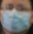

In [ ]:
#Using cv2 to output images
from google.colab.patches import cv2_imshow
import cv2
#Image 1
img_1 = cv2_imshow(data_analysis_images[0]['image'])

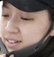

In [ ]:
#Image 2
img_2 = cv2_imshow(data_analysis_images[1]['image'])

In [ ]:
#Image 3
img_3 = cv2_imshow(data_analysis_images[2]['image'])

In [ ]:
#Image 4
img_4 = cv2_imshow(data_analysis_images[3]['image'])

In [ ]:
img_5 = cv2_imshow(data_analysis_images[4]['image'])

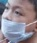

In [ ]:
img_6 = cv2_imshow(data_analysis_images[5]['image'])

We can see that images come in different shapes and sizes. While rescaling images is better for TensorFlow and Torch models, for feature selectors we keep the images as they are to avoid the resolution hindering identification of important features.

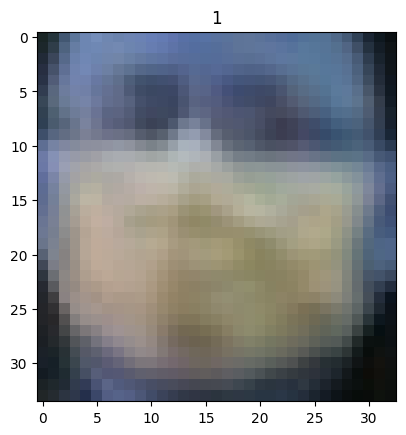

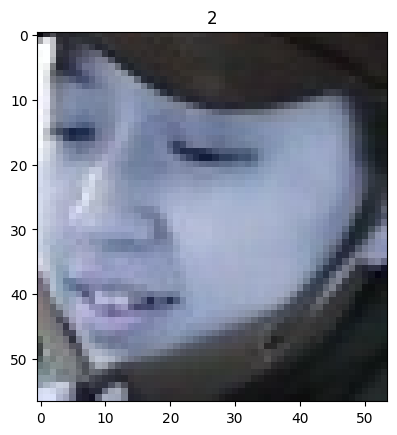

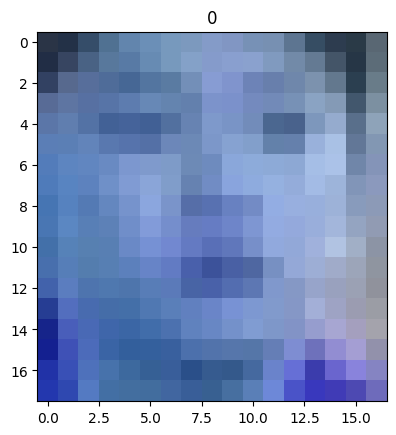

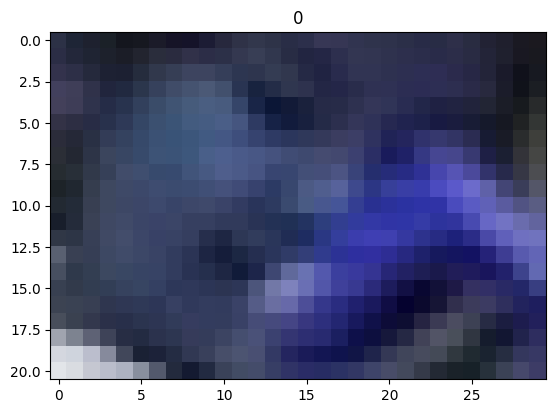

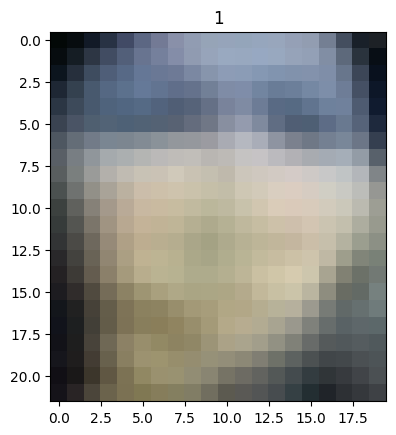

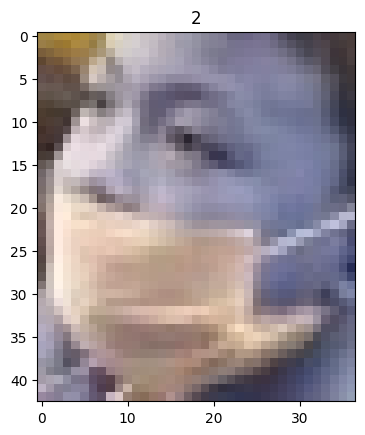

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt

for image_dict in data_analysis_images:
    image = image_dict['image']
    label = image_dict['label']
    plt.imshow(image)
    plt.title(label)
    plt.show()

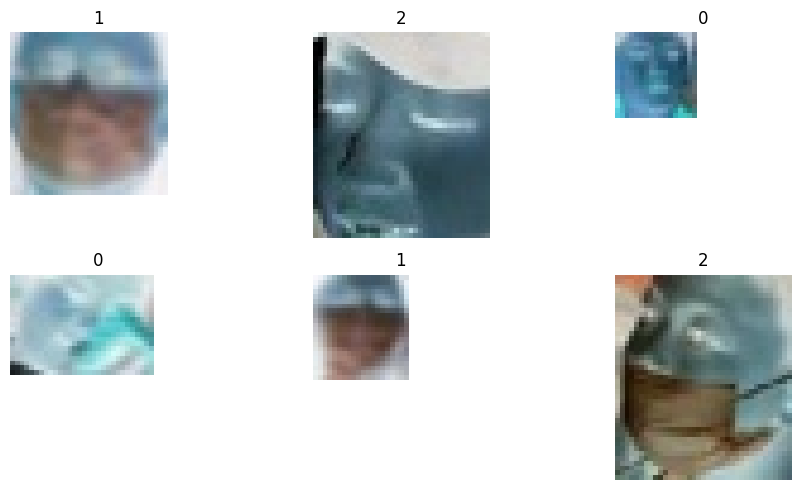

In [ ]:
# Negative Images
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10,5), sharex = True, sharey = True)
ax = axes.ravel()

for i, image_dict in enumerate(data_analysis_images):
    image_neg = 255 - image_dict['image']
    label = image_dict['label']
    ax[i].imshow(cv2.cvtColor(image_neg, cv2.COLOR_BGR2RGB))
    ax[i].set_title(label)
    ax[i].set_axis_off()

fig.tight_layout()
plt.show()

## Model Preparation

In [ ]:
#Loading images and labels into seperate lists for models

#Empty lists
X_train = []
X_test = []
y_train = []
y_test = []

#Appending images to X_train and labels to y_train from train dictionary
for key, value in train_image_label_dict.items():
  X_train.append(value['image'])
  y_train.append(value['label'])

#Appending images to X_test and labels to y_test from train dictionary
for key, value in test_image_label_dict.items():
  X_test.append(value['image'])
  y_test.append(value['label'])

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

2394 458 2394 458


## Using Feature Selectors + Machine Learning models for analysis




In [ ]:
#Imports
import skimage
from sklearn.neighbors import KNeighborsClassifier
from skimage.feature import SIFT
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

### SIFT + KNN (Scale-Invariant Feature Transform and K-Nearest Neighbours)

#### Training

In [ ]:
#Instantiating the sift model with all hyperparameter options listed
sift = cv2.xfeatures2d.SIFT_create(nfeatures=1000,        # maximum number of keypoints to retain
                                   nOctaveLayers=3,       # number of layers in each octave
                                   contrastThreshold=0.04,# contrast threshold for keypoint detection
                                   edgeThreshold=10,      # edge threshold for keypoint detection
                                   sigma=1.6)             # standard deviation of Gaussian blur applied to input image

In [ ]:
# Compute SIFT descriptors and keypoints for each image in X_train
# Empty lists for descriptors and keypoints
descriptor_list = []
keypoint_list = []

# Creating new lists for where there are is a descriptor for X_train images
new_X_train = []
new_y_train = []

for i, img in enumerate(X_train):
    # Changing all the images to gray-scale
    X_train_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Computing keypoints and descriptors using sift algorithm
    keypoint, descriptor = sift.detectAndCompute(X_train_gray, None)
    # Check to see if there is a descriptor greater than 0 before adding to list
    if descriptor is not None and len(descriptor) > 0:
        # Append descriptor for each image to list
        descriptor_list.append(descriptor)
        # Append keypoint for each image to list
        keypoint_list.append(keypoint)
        # Append image to new list
        new_X_train.append(img)
        # Append label to new list
        new_y_train.append(y_train[i])

# Convert list of descriptors to NumPy array
descriptors_np = np.vstack(descriptor_list)

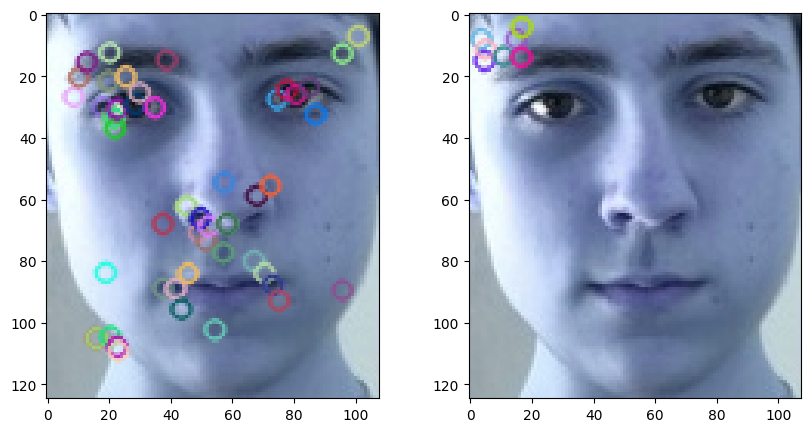

In [ ]:
#Sourced from lab 05
# Draw keypoints on original image
img_with_keypoints = cv2.drawKeypoints(X_train[0], keypoint_list[0], None)
# Draw keypoints on SIFT image
sift_img_with_keypoints = cv2.drawKeypoints(X_train[0], keypoint, None)

# Display the original image and the SIFT image side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_with_keypoints)
ax[1].imshow(sift_img_with_keypoints)
plt.show()

In [ ]:
#We now move on to cluster the descriptors using the K-Means algorithm
kmeans = KMeans(n_clusters=3)
#Fit the k-means algorithm to descriptors
kmeans.fit(descriptors_np)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Appending our predictions for the descriptors by using the k-means algorithm
#to output words describing each image based on their descriptor (KMeans and BoVW approach)
#to list to use for KNN

# Create an empty list to store the Bag-of-Words histograms
X_bow = []

# Iterate through the list of descriptors for each image
for descriptor in descriptor_list:

    # Use k-means to predict which visual word each descriptor belongs to
    # The predicted word is stored in a NumPy array
    words = kmeans.predict(descriptor)

    # Compute a histogram of the predicted visual words
    # The bins parameter specifies the edges of the histogram bins
    histogram, _ = np.histogram(words, bins=range(101))

    # Append the histogram to the list of Bag-of-Words histograms for this image
    X_bow.append(histogram)

#### Optimisation


In [ ]:
# Create a K-Nearest Neighbors classifier with k=5, uniform weighting, and Euclidean distance metric
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)

# Train the classifier on the Bag-of-Words histograms and corresponding labels from the training set
knn.fit(X_bow, new_y_train)


KNeighborsClassifier()

In [ ]:
#We cannot perform a gridsearch on SIFT objects as openCV's objects are not pickable

#Optimising our KNN model
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Creating pipeline - we cannot add SIFT algorithm unless we create a class for it
pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 10, 50, 100, 500, 1000],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_bow, new_y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'knn__n_neighbors': 50, 'knn__p': 1, 'knn__weights': 'uniform'}


In [ ]:
# Create a K-Nearest Neighbors classifier with k=1, uniform weighting, and Manhattan distance metric
# after optimising above
knn_optim = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=1)

# Train the classifier on the Bag-of-Words histograms and corresponding labels from the training set
knn_optim.fit(X_bow, new_y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

#### Testing

In [ ]:
#Computing the BoVW for test features and predicting their labels
X_test_bow = []
for img in X_test:
  test_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  keypoints, descriptors = sift.detectAndCompute(test_gray, None)
  if descriptors is not None and len(descriptors) > 0:
    words = kmeans.predict(descriptors)
    histogram, _ = np.histogram(words, bins = range(101))
    X_test_bow.append(histogram)
  else:
    X_test_bow.append(None)

In [ ]:
y_pred = []
for i in range(len(X_test)):
    if X_test_bow[i] is not None:
        y_pred_i = knn_optim.predict([X_test_bow[i]])
        y_pred.append(y_pred_i[0])
    else:
        y_pred.append(None)

# Compute the accuracy
accuracy_1 = sum([1 for i in range(len(y_test)) if y_test[i] == y_pred[i]]) / len(y_test)
print(f"Accuracy: {accuracy_1}")

Accuracy: 0.74235807860262


In [ ]:
import math
# Confusion Matrix
null_indices = [i for i, x in enumerate(y_pred) if x is None]

y_pred_clean = [x for x in y_pred if x is not None]
y_pred_clean

y_test_clean = [x for i, x in enumerate(y_test) if i not in null_indices]

#cm1 = confusion_matrix(y_test, y_pred)

#### Results

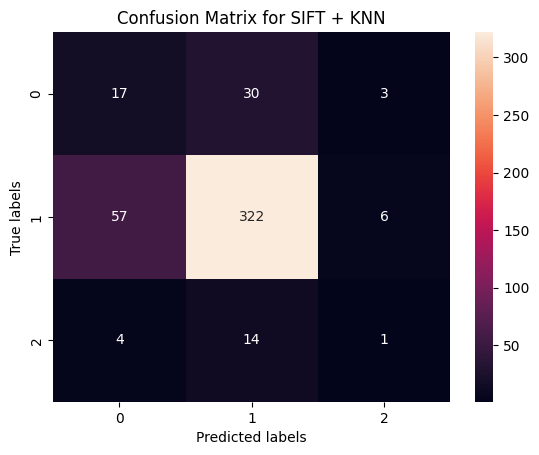

In [ ]:
cm = confusion_matrix(y_test_clean, y_pred_clean)
# plot the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for SIFT + KNN');

In [ ]:
from sklearn.metrics import f1_score, cohen_kappa_score, hamming_loss

# y_test and y_pred are numpy arrays of shape (n_samples,)
# with integer labels in the range [0, n_classes-1]

# Accuracy Score
accuracy_score_1 = accuracy_score(y_test_clean, y_pred_clean)

# Compute F1 score
f1_score_1 = f1_score(y_test_clean, y_pred_clean, average='macro')

# Compute Cohen's kappa
kappa_1 = cohen_kappa_score(y_test_clean, y_pred_clean)

# Compute Hamming loss
hamming_1 = hamming_loss(y_test_clean, y_pred_clean)

print("F1 score:", f1_score_1)
print("Cohen's kappa:", kappa_1)
print("Hamming loss:", hamming_1)
print("Accuracy Score:", accuracy_score_1)

F1 score: 0.39737127316834253
Cohen's kappa: 0.1531513842528961
Hamming loss: 0.2511013215859031
Accuracy Score: 0.748898678414097


In [ ]:
from sklearn.metrics import classification_report

report_1 = classification_report(y_test_clean, y_pred_clean, output_dict = True)
print(report_1)

{'0': {'precision': 0.21794871794871795, 'recall': 0.34, 'f1-score': 0.265625, 'support': 50}, '1': {'precision': 0.8797814207650273, 'recall': 0.8363636363636363, 'f1-score': 0.8575233022636484, 'support': 385}, '2': {'precision': 0.1, 'recall': 0.05263157894736842, 'f1-score': 0.06896551724137931, 'support': 19}, 'accuracy': 0.748898678414097, 'macro avg': {'precision': 0.39924337957124845, 'recall': 0.4096650717703349, 'f1-score': 0.39737127316834253, 'support': 454}, 'weighted avg': {'precision': 0.7742583323611705, 'recall': 0.748898678414097, 'f1-score': 0.7593349475750899, 'support': 454}}


<Axes: title={'center': 'Classification Report SIFT-KNN'}>

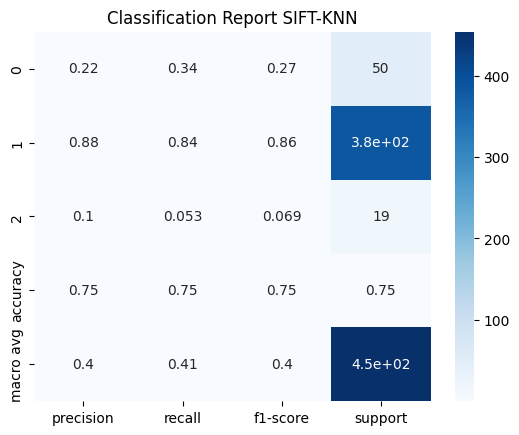

In [ ]:
df = pd.DataFrame.from_dict(report_1).T.iloc[:-1, :]

plt.title("Classification Report SIFT-KNN")
sns.heatmap(df, annot=True, cmap='Blues')

##### Saving Model

In [ ]:
# Save SVM classifier to disk using joblib
dump(knn_optim, 'knn_model.joblib')

['knn_model.joblib']

### HOG + MLP (Histogram of Orientated Gradients and Multi-Layer Perceptron)

#### Training

In [ ]:
from skimage.feature import hog
from skimage import data, exposure

In [ ]:
HOG_features = []
HOG_images = []

orientations = 8
pixels_per_cell = (16, 16)
cells_per_block = (1,1)




for image in X_train:
  HOG_feature, HOG_image = hog(image,
                               orientations = orientations,
                                pixels_per_cell = pixels_per_cell,
                                cells_per_block = cells_per_block,
                                visualize = True,
                                channel_axis = 2)
  # Add HOG features to list
  HOG_features.append(HOG_feature)
  # Add HOG images to a list
  HOG_images.append(HOG_image)

# Reshape HOG features to 1D array
HOG_features_np = np.ravel(HOG_features)

#Convert HOG features to numpy array
HOG_images = np.array(HOG_images)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:1859: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)
<ipython-input-39-2f0125dc3de3>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  HOG_images = np.array(HOG_images)


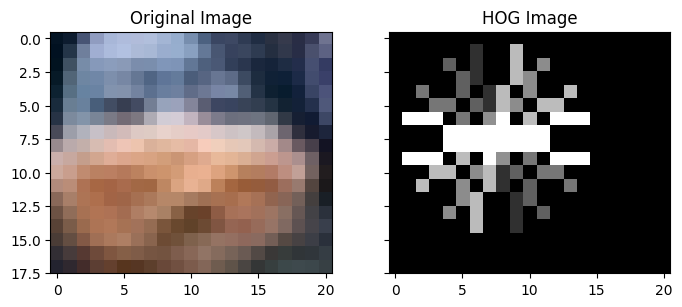

In [ ]:
# Show original and HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original Image')

# Adjust the contrast of the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(HOG_image, in_range=(0, 10))

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG Image')

plt.show()

In [ ]:
max_length = max([len(arr) for arr in HOG_features])
padded_features = []
for arr in HOG_features:
    pad_width = [(0, max_length - len(arr))] + [(0, 0)] * (arr.ndim - 1)
    padded_arr = np.pad(arr, pad_width=pad_width, mode='constant', constant_values=0)
    padded_features.append(padded_arr)

In [ ]:
len(padded_features)

2394

#### Optimisation

In [ ]:
# Define MLP architiecture
MLP = MLPClassifier(hidden_layer_sizes = (100, ), activation = "relu",
                    solver="adam", random_state=42, max_iter = 1000)

y_train_array = np.array(y_train)

y_train_array = y_train_array.astype('int')

MLP.fit(padded_features, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(MLP, param_grid, cv=5)
grid_search.fit(padded_features, y_train)

print("Best parameters: ", grid_search.best_params_)

In [ ]:
MLP_optimised = MLPClassifier(hidden_layer_sizes = (50, 50),
                              activation = "relu",
                              solver = "sgd",
                              alpha =  0.01,
                              learning_rate = "constant",
                              random_state = 42,
                              max_iter = 50)

MLP_optimised.fit(padded_features, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=50,
              random_state=42, solver='sgd')

#### Testing

In [ ]:
HOG_features_test = []
HOG_images_test = []

orientations = 8
pixels_per_cell = (16, 16)
cells_per_block = (1,1)


for image in X_test:
  HOG_feature, HOG_image = hog(image, orientations = orientations,
                           pixels_per_cell = pixels_per_cell,
                           cells_per_block = cells_per_block,
                           visualize = True,
                           channel_axis = 2)
  # Add HOG features to list
  HOG_features_test.append(HOG_feature)
  # Add HOG images to a list
  HOG_images_test.append(HOG_image)

# Reshape HOG features to 1D array
HOG_features_np_test = np.ravel(HOG_features)

#Convert HOG features to numpy array
HOG_images_test = np.array(HOG_images_test)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:1859: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)
<ipython-input-45-434b4014b258>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  HOG_images_test = np.array(HOG_images_test)


In [ ]:
# Pad the descriptors
max_length_trainh = max([len(arr) for arr in HOG_features])
max_length_testh = max([len(arr) for arr in HOG_features_test])
max_lengthh = max(max_length_trainh, max_length_testh)
padded_features_testh = []
for arr in HOG_features_test:
    if len(arr) == max_length:
        padded_features_testh.append(arr)
    else:
        pad_width = [(0, max_length - len(arr))] + [(0, 0)] * (arr.ndim - 1)
        padded_arr = np.pad(arr, pad_width=pad_width, mode='constant', constant_values=0)
        padded_features_testh.append(padded_arr)

#### Results

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

# Obtain predictions on the test data
y_pred_2 = MLP_optimised.predict(padded_features_testh)

# Build a confusion matrix
cm_2 = metrics.confusion_matrix(y_test, y_pred_2)

# Calculate the accuracy score
accuracy_score_2 = metrics.accuracy_score(y_test, y_pred_2)

# Calculate the hamming score
hamming_score_2 = metrics.hamming_loss(y_test, y_pred_2)

# Calculate the Cohen's kappa score
cohen_kappa_score_2 = metrics.cohen_kappa_score(y_test, y_pred_2)

# Compute F1 score
f1_score_2 = f1_score(y_test, y_pred_2, average='macro')

print("Confusion Matrix:")
print(cm_2)

print("Accuracy Score:", accuracy_score_2)
print("Hamming Score:", hamming_score_2)
print("Cohen's Kappa Score:", cohen_kappa_score_2)
print("F1 score:", f1_score_2)

Confusion Matrix:
[[  0  51   0]
 [  0 388   0]
 [  0  19   0]]
Accuracy Score: 0.8471615720524017
Hamming Score: 0.15283842794759825
Cohen's Kappa Score: 0.0
F1 score: 0.30575256107171


In [ ]:
from sklearn.metrics import classification_report

report_2 = classification_report(y_test, y_pred_2, output_dict=True)
print(report_2)

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 51}, '1': {'precision': 0.8471615720524017, 'recall': 1.0, 'f1-score': 0.91725768321513, 'support': 388}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 19}, 'accuracy': 0.8471615720524017, 'macro avg': {'precision': 0.2823871906841339, 'recall': 0.3333333333333333, 'f1-score': 0.30575256107171, 'support': 458}, 'weighted avg': {'precision': 0.7176827291622967, 'recall': 0.8471615720524017, 'f1-score': 0.7770654608896734, 'support': 458}}


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Classification Report HOG-MLP'}>

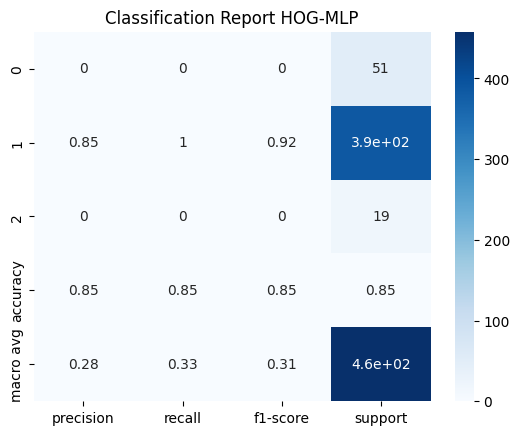

In [ ]:
df1 = pd.DataFrame.from_dict(report_2).T.iloc[:-1, :]

plt.title("Classification Report HOG-MLP")
sns.heatmap(df1, annot=True, cmap='Blues')

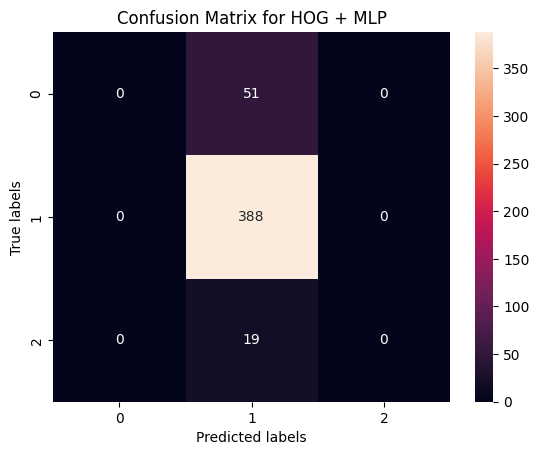

In [ ]:
# plot the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for HOG + MLP');

##### Saving Model

In [ ]:
dump(MLP_optimised, 'mlp_model.joblib')

['mlp_model.joblib']

3. ORB + SVM (Orientated FAST and Rotated BRIEF and Support Vector Machine)

#### Training

In [ ]:
# Create ORB detector with custom parameters
orb = cv2.ORB_create(nfeatures=500,      # maximum number of keypoints to retain
                     scaleFactor=1.2,    # pyramid decimation ratio
                     nlevels=8,          # number of pyramid levels to use
                     edgeThreshold=31,   # threshold used to discard keypoints close to edges
                     patchSize=31,       # size of the patch used for computing BRIEF descriptors
                     WTA_K=2,            # number of points that are compared in the BRIEF descriptor
                     fastThreshold=20)   # threshold used for the FAST corner detector

In [ ]:
# Compute ORB descriptors and keypoints for each image in X_train
descriptor_list_1 = []
keypoint_list_1 = []

new_X_train_1 = []
new_y_train_1 = []

# Loop over images in X_train
for i, img in enumerate(X_train):
    # Convert image to grayscale
    X_train_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find keypoints and descriptors using ORB
    keypoint, descriptor = orb.detectAndCompute(X_train_gray, None)

    # Check if descriptor is valid and append to lists
    if descriptor is not None and len(descriptor) > 0:
        descriptor_list_1.append(descriptor)
        keypoint_list_1.append(keypoint)
        new_X_train_1.append(img)
        new_y_train_1.append(y_train[i])
# Convert list of descriptors to NumPy array
descriptors_np_1 = np.vstack(descriptor_list_1)

In [ ]:
max_length1 = max([len(arr) for arr in descriptor_list_1])
padded_features1 = []
for arr in descriptor_list_1:
    if len(arr) == max_length1:
        padded_features1.append(arr)
    else:
        pad_width = [(0, max_length1 - len(arr))] + [(0, 0)] * (arr.ndim - 1)
        padded_arr = np.pad(arr, pad_width=pad_width, mode='constant', constant_values=0)
        padded_features1.append(padded_arr)

In [ ]:
# We create a NumPy array of labels
labels_np = np.array(new_y_train_1)

X_train_flat = np.array([descriptor.ravel() for descriptor in padded_features1])

#### Optimisation

In [ ]:
#Instantiate an object of the SVM class
svm = SVC(kernel='linear', C=10)

#Train the SVM
svm.fit(X_train_flat, labels_np)

SVC(C=10, kernel='linear')

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10],                               # A list of regularization parameter values to try
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # A list of kernel functions to try
    'degree': [2, 3, 4],                             # A list of polynomial degree values to try when using a polynomial kernel function
    'gamma': ['scale', 'auto'],                      # A list of gamma values to try. This hyperparameter is ignored for linear kernels.
    'class_weight': ['balanced', None]               # A list of class weight options to try. 'balanced' adjusts weights inversely proportional to class frequencies in the input data, while None assumes equal weights.
}

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_flat, labels_np)

# Print the best parameters found by the grid search
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 0.1, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
svm_optimised = SVC(kernel = 'poly',
                    C = 0.1,
                    class_weight = "balanced",  #This has to be balanced as we have a dictionary
                    degree = 2,
                    gamma = "scale")

svm_optimised.fit(X_train_flat, labels_np)

SVC(C=0.1, class_weight='balanced', degree=2, kernel='poly')

#### Testing

In [ ]:
# Get ORB descriptors and keypoints for each image in X_test
descriptor_list_test = []
keypoint_list_test = []

new_X_test = []
new_y_test = []

# Loop over images in X_test
for i, img in enumerate(X_test):
    # Convert image to grayscale
    X_test_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find keypoints and descriptors using ORB
    keypoint, descriptor = orb.detectAndCompute(X_test_gray, None)

    # Check if descriptor is valid and append to lists
    if descriptor is not None and len(descriptor) > 0:
        descriptor_list_test.append(descriptor)
        keypoint_list_test.append(keypoint)
        new_X_test.append(img)
        new_y_test.append(y_test[i])

# Convert list of descriptors to NumPy array
descriptors_np_test = np.vstack(descriptor_list_test)

# Pad the descriptors
max_length_train = max([len(arr) for arr in descriptor_list_1])
max_length_test = max([len(arr) for arr in descriptor_list_test])
max_length = max(max_length_train, max_length_test)
padded_features_test = []
for arr in descriptor_list_test:
    if len(arr) == max_length:
        padded_features_test.append(arr)
    else:
        pad_width = [(0, max_length - len(arr))] + [(0, 0)] * (arr.ndim - 1)
        padded_arr = np.pad(arr, pad_width=pad_width, mode='constant', constant_values=0)
        padded_features_test.append(padded_arr)

# Create a NumPy array of labels
labels_test_np = np.array(new_y_test)

# Flatten the descriptors
X_test_flat = np.array([descriptor.ravel() for descriptor in padded_features_test])

#### Results

Test data shape: (47, 12928)
Accuracy: 0.6595744680851063
Confusion matrix:
 [[ 5  2  0]
 [10 26  0]
 [ 3  1  0]]
Hamming loss: 0.3404255319148936
Cohen's Kappa Score: 0.2762271414821944
F1_Score: 0.6595744680851063


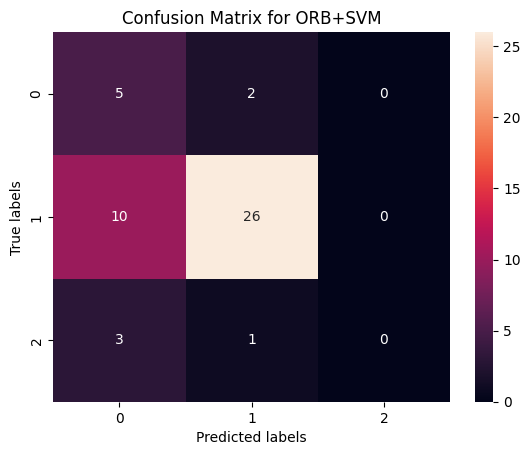

In [ ]:
# Make predictions using the SVM
y_pred_3 = svm_optimised.predict(X_test_flat)

# Print the shape of the test data
print("Test data shape:", X_test_flat.shape)

# Compute accuracy, confusion matrix and hamming score, f1_score
accuracy_3 = accuracy_score(labels_test_np, y_pred_3)
cm_3 = confusion_matrix(labels_test_np, y_pred_3)
hamming_score_3 = hamming_loss(labels_test_np, y_pred_3)
f1_score_3 = f1_score(labels_test_np, y_pred_3, average = 'micro')
# Calculate the Cohen's kappa score
cohen_kappa_score_3 = cohen_kappa_score(labels_test_np, y_pred_3)

print("Accuracy:", accuracy_3)
print("Confusion matrix:\n", cm_3)
print("Hamming loss:", hamming_score_3)
print("Cohen's Kappa Score:", cohen_kappa_score_3)
print("F1_Score:", f1_score_3)

# plot the confusion matrix
ax= plt.subplot()
sns.heatmap(cm_3, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for ORB+SVM');

{'0': {'precision': 0.2777777777777778, 'recall': 0.7142857142857143, 'f1-score': 0.4, 'support': 7}, '1': {'precision': 0.896551724137931, 'recall': 0.7222222222222222, 'f1-score': 0.7999999999999999, 'support': 36}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}, 'accuracy': 0.6595744680851063, 'macro avg': {'precision': 0.39144316730523626, 'recall': 0.47883597883597884, 'f1-score': 0.39999999999999997, 'support': 47}, 'weighted avg': {'precision': 0.7280916279448928, 'recall': 0.6595744680851063, 'f1-score': 0.6723404255319149, 'support': 47}}


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Classification Report ORB-SVM')

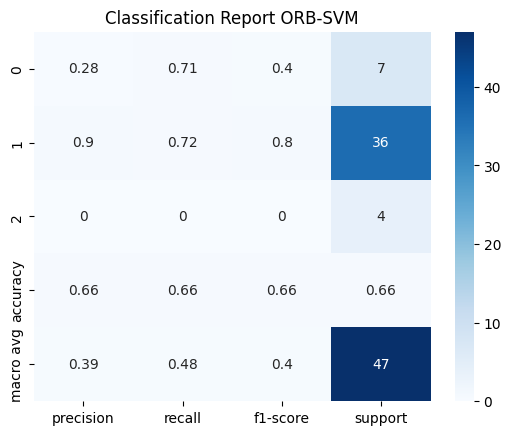

In [ ]:
from sklearn.metrics import classification_report

report_3 = classification_report(labels_test_np, y_pred_3, output_dict = True)
print(report_3)

df3 = pd.DataFrame.from_dict(report_3).T.iloc[:-1, :]
sns.heatmap(df3, annot=True, cmap='Blues')
plt.title("Classification Report ORB-SVM")

##### Saving Model

In [ ]:
dump(svm_optimised, 'svm_model.joblib')

['svm_model.joblib']

4. CNN (TensorFlow)

#### Loading Data

In [ ]:
# We are going to load the images in directly into a ImageFolder since the dictionary method keeps
# giving errors
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Initialising Batch Size
batch_size = 30

#Paths to re-arranged datasets
train_path = r"/content/drive/MyDrive/CW_Folder_PG/NN_Data/train"
test_path = r"/content/drive/MyDrive/CW_Folder_PG/NN_Data/test"

#Loading training data into Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,            # rescale pixel values between 0 and 1
    rotation_range=20,         # randomly rotate images by 20 degrees
    width_shift_range=0.2,     # randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,    # randomly shift images vertically by 20% of the height
    shear_range=0.2,           # randomly apply shearing transformations
    zoom_range=0.2,            # randomly zoom in on images
    horizontal_flip=True,      # randomly flip images horizontally
    fill_mode='nearest',       # fill any gaps created by the above transformations with the nearest pixel
    validation_split = 0.2     # Initialise validation split for validation dataset
)

#Loading testing data into Image Data Generator
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = train_datagen.flow_from_directory(
    train_path,               # path to the directory containing the training images
    target_size=(125, 125),   # resize images to 150x150 pixels
    batch_size= batch_size,   # batch size
    class_mode='categorical', # categorical classification
    subset = "training",       #Training Subset of the image data generator
    classes = ['0', '1', '2']
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (125, 125),
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation",    #Validation subset of the image data generator
    classes = ['0', '1', '2']
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(125,125),
    batch_size= batch_size,
    class_mode='categorical',
    classes = ['0', '1', '2']
)

Found 1916 images belonging to 3 classes.
Found 478 images belonging to 3 classes.
Found 458 images belonging to 3 classes.


#### Model Construction

In [ ]:
# Get a batch of images and labels from the generator
images, labels = next(train_generator)

# Print the shape of the image batch
print('Image shape:', images.shape[1:])

Image shape: (125, 125, 3)


In [ ]:
for data_batch, labels_batch in train_generator:
    print("data_batch shape --> ",data_batch.shape)
    print("labels_batch shape --> ",labels_batch.shape)
    break

data_batch shape -->  (30, 125, 125, 3)
labels_batch shape -->  (30, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def kerasCNN(conv_units = 64, dropout = 0.5, activation = "softmax", kernel_size = (3,3), fc_1_units = 128):
    # Create a sequential model
    model = Sequential()
    # Add a 2D convolutional layer with 32 filters, 3x3 kernel
    model.add(Conv2D(conv_units, kernel_size=kernel_size, activation=activation, input_shape = (125, 125, 3)))
    # Add a max pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Add a flatten layer to convert the 3D feature map into a 1D feature vector
    model.add(Flatten())
    # Add a dense layer with 128 neurons
    model.add(Dense(fc_1_units))
    # Add a dropout layer to control overfitting
    model.add(Dropout(dropout))
    # Add an output layer with 3 neurons (one for each class) and a softmax activation function
    model.add(Dense(3, activation = "softmax"))
    # Compiling the model
    model.compile(loss = "categorical_crossentropy",
                  optimizer = "rmsprop",
                  metrics = ["Accuracy", "Recall", 'Precision'])
    return model

#### Model Training

In [ ]:
model = kerasCNN() # batch size = 32
# Fit the model on data # batch size
history = model.fit(train_generator, epochs = 10)

Epoch 1/10
64/64 [==============================] - 103s 2s/step - loss: 9.4446 - Accuracy: 0.6686 - recall: 0.6587 - precision: 0.6691
Epoch 2/10
64/64 [==============================] - 92s 1s/step - loss: 5.7769 - Accuracy: 0.6759 - recall: 0.6759 - precision: 0.6762
Epoch 3/10
64/64 [==============================] - 89s 1s/step - loss: 3.9200 - Accuracy: 0.7025 - recall: 0.7009 - precision: 0.7028
Epoch 4/10
64/64 [==============================] - 91s 1s/step - loss: 2.8113 - Accuracy: 0.7082 - recall: 0.7077 - precision: 0.7092
Epoch 5/10
64/64 [==============================] - 93s 1s/step - loss: 1.8986 - Accuracy: 0.7129 - recall: 0.7124 - precision: 0.7135
Epoch 6/10
64/64 [==============================] - 102s 2s/step - loss: 1.2566 - Accuracy: 0.7453 - recall: 0.7453 - precision: 0.7465
Epoch 7/10
64/64 [==============================] - 89s 1s/step - loss: 1.1285 - Accuracy: 0.7636 - recall: 0.7620 - precision: 0.7652
Epoch 8/10
64/64 [==============================] - 8

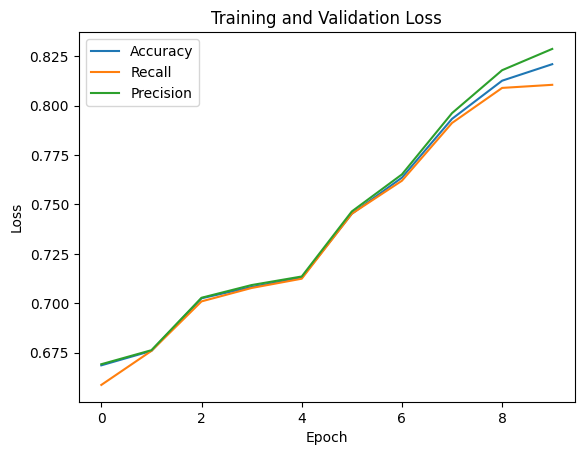

In [ ]:
#plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['Accuracy'], label='Accuracy')
plt.plot(history.history['recall'], label = 'Recall')
plt.plot(history.history['precision'], label = 'Precision')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Optimisation

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# Hyper-parameter Tuning Optimisation
clf = KerasClassifier(build_fn=kerasCNN, epochs=20, batch_size = 799, verbose = 0)

<ipython-input-90-cec3df25937c>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=kerasCNN, epochs=20, batch_size = 799, verbose = 0)


In [ ]:
param_grid = {
    'conv_units' : [32, 64, 128],
    'dropout' : [0.1, 0.2, 0.5, 0.75],
    'activation' : ['relu', 'softmax', 'tanh'],
    'kernel_size' : [(2,2), (3,3), (4,4)],
    'fc_1_units' : [32, 64, 128]
}

In [ ]:
grid = GridSearchCV(clf, param_grid = param_grid, cv=2)
grid_result = grid.fit(validation_generator)

In [ ]:
model_optimised = kerasCNN(conv_units = 128,
                           dropout = 0.5,
                           activation = "relu",
                           kernel_size = (2,2),
                           fc_1_units = 128)

In [ ]:
history_optimised = model_optimised.fit(train_generator, epochs = 10)

Epoch 1/10
64/64 [==============================] - 139s 2s/step - loss: 8.5921 - Accuracy: 0.8074 - recall: 0.7985 - precision: 0.8195
Epoch 2/10
64/64 [==============================] - 140s 2s/step - loss: 0.3417 - Accuracy: 0.9113 - recall: 0.8967 - precision: 0.9237
Epoch 3/10
64/64 [==============================] - 134s 2s/step - loss: 0.3139 - Accuracy: 0.9123 - recall: 0.9008 - precision: 0.9210
Epoch 4/10
64/64 [==============================] - 136s 2s/step - loss: 0.3032 - Accuracy: 0.9134 - recall: 0.9019 - precision: 0.9211
Epoch 5/10
64/64 [==============================] - 134s 2s/step - loss: 0.3169 - Accuracy: 0.9160 - recall: 0.9061 - precision: 0.9259
Epoch 6/10
64/64 [==============================] - 146s 2s/step - loss: 0.2850 - Accuracy: 0.9243 - recall: 0.9139 - precision: 0.9309
Epoch 7/10
64/64 [==============================] - 136s 2s/step - loss: 0.2741 - Accuracy: 0.9128 - recall: 0.9040 - precision: 0.9252
Epoch 8/10
64/64 [==============================

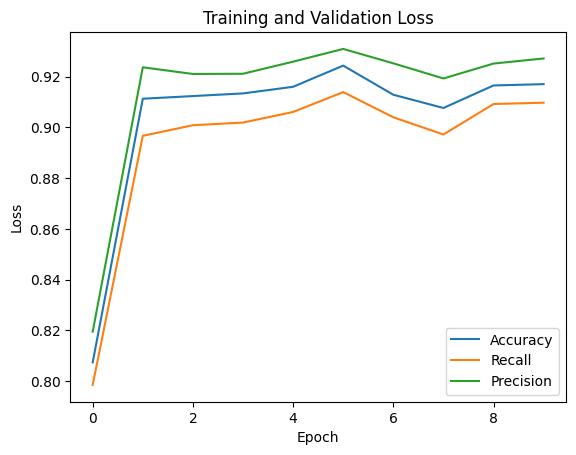

In [ ]:
plt.plot(history_optimised.history['Accuracy'], label='Accuracy')
plt.plot(history_optimised.history['recall'], label = 'Recall')
plt.plot(history_optimised.history['precision'], label = 'Precision')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing + Results

In [ ]:
y_pred_4 = model_optimised.predict(test_generator)
final_y_pred = np.argmax(y_pred_4, axis = 1)
y_true = test_generator.classes


16/16 [==============================] - 92s 6s/step


Accuracy: 0.759825327510917
Confusion matrix:
 [[  7  44   0]
 [ 45 341   2]
 [  2  17   0]]
Hamming loss: 0.24017467248908297
Cohen's Kappa Score: 0.012079378774805916
F1_Score: 0.759825327510917


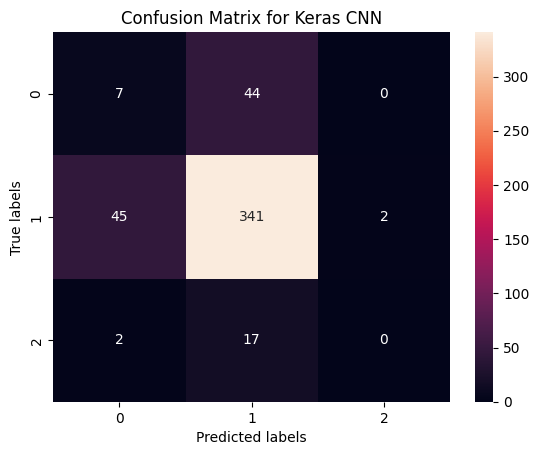

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute accuracy, confusion matrix and hamming score, f1_score
accuracy_4 = accuracy_score(y_true, final_y_pred)
cm_4 = confusion_matrix(y_true, final_y_pred, labels=[0, 1, 2])
hamming_score_4 = hamming_loss(y_true, final_y_pred)
f1_score_4 = f1_score(y_true, final_y_pred, average = 'micro')
# Calculate the Cohen's kappa score
cohen_kappa_score_4 = cohen_kappa_score(y_true, final_y_pred)

print("Accuracy:", accuracy_4)
print("Confusion matrix:\n", cm_4)
print("Hamming loss:", hamming_score_4)
print("Cohen's Kappa Score:", cohen_kappa_score_4)
print("F1_Score:", f1_score_4)

ax= plt.subplot()
sns.heatmap(cm_4, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for Keras CNN');

Text(0.5, 1.0, 'Classification Report CNN')

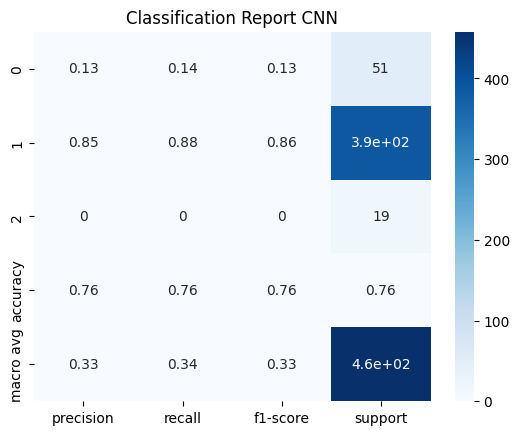

In [ ]:
from sklearn.metrics import classification_report
report4 = classification_report(y_true, final_y_pred, output_dict = True)

df4 = pd.DataFrame.from_dict(report4).T.iloc[:-1, :]
sns.heatmap(df4, annot=True, cmap='Blues')
plt.title("Classification Report CNN")

##### Saving Model

In [ ]:
dump(model_optimised, "cnn_model.joblib")

['cnn_model.joblib']